In [1]:
import numpy as np

from graphtools import *
from vectools import *

In [2]:
def tree_coords(X: list[int], xd=1, yd=1):
    depth = len(X)
    coord_dict = {1: (0, yd)}
    #start from middle layer:
    midrange = list(range(tree_mag(X[1:])+1, tree_mag(X)+1))

    #give coordinates to the middle level
    for i,vertex in  enumerate(midrange):
        y = 0
        x_coords = np.linspace(-xd*len(midrange), xd*len(midrange), len(midrange))
        coord_dict[vertex] = (x_coords[i] , y)

    for layer in range(depth,1,-1):
        x_coords = []
        parent_layer_mag = np.cumprod(X[depth-layer+1:])[-1]
        #upper
        parents = list(
            range(
                tree_mag(X[depth - layer + 2 :]) + 1,
                tree_mag(X[depth - layer + 1 :]) + 1,)
        )
        #print(upper_parents)
        for i, node in enumerate(parents):
            children = list(
                range(
                    parents[0] + parent_layer_mag + X[depth - layer] * i,
                    parents[0] + parent_layer_mag + X[depth - layer] * (i + 1),
                )
            )
            x_coords.append( np.mean([coord_dict[j][0] for j in children] ))
        y_coord = yd* (depth-layer+1)/depth
        for i, node in enumerate(parents):
            coord_dict[node] = (x_coords[i] , y_coord)
    return coord_dict


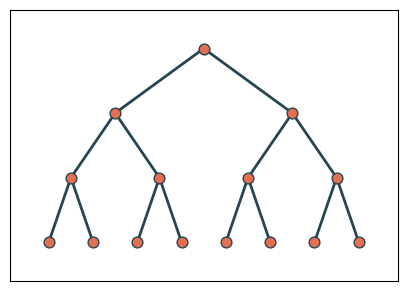

In [5]:
X = [2]*3

tree =generate_good_tree(X)

pl_graph(tree,positions=tree_coords(X,xd=1,yd=10),vertex_size=60,outline_weight = 1, edge_weight=2,margin=2)

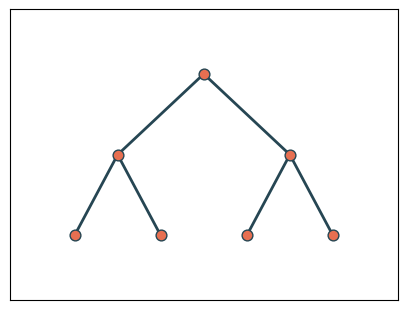

In [4]:
X = [2]*2

tree =generate_good_tree(X)

pl_graph(tree,positions=tree_coords(X,xd=1,yd=5),vertex_size=60,outline_weight = 1, edge_weight=2,margin=2)

NetworkXError: Node 5 has no position.

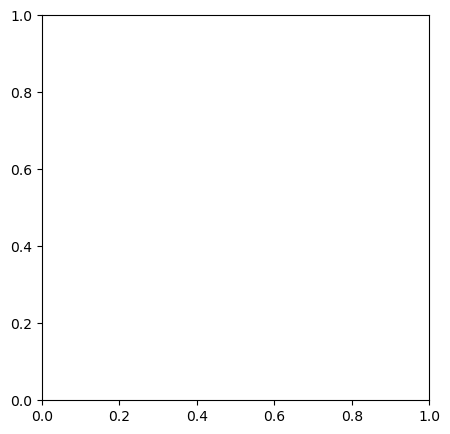

In [7]:
pl_graph(shift_graph(graph_from_adj(cascade(X)),1),positions=glued_tree_coords(X,xd=1,yd=5),vertex_size=60,outline_weight = 1, edge_weight=2,margin=2)

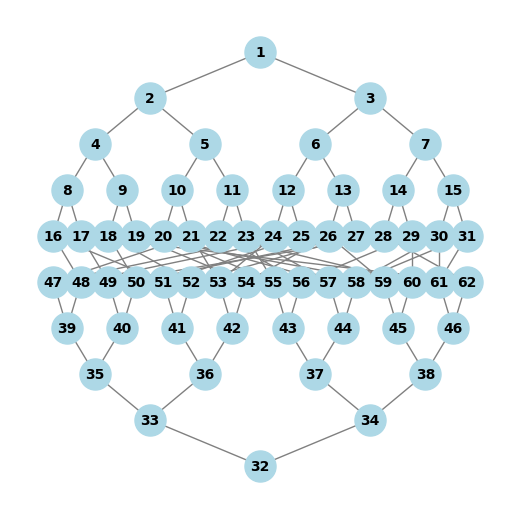

In [6]:
rand = generate_random_cycle_graph(tree)
pl_graph(rand, positions=rand_cycle_coords(X))

In [7]:
ftree = fluxedTree(X)

1.0


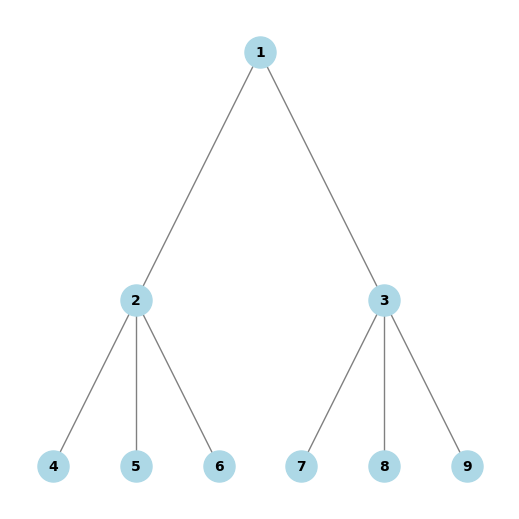

In [8]:
pl_graph(ftree,positions=tree_coords(X))

In [9]:
ftree.construct_fluxed()

1.0


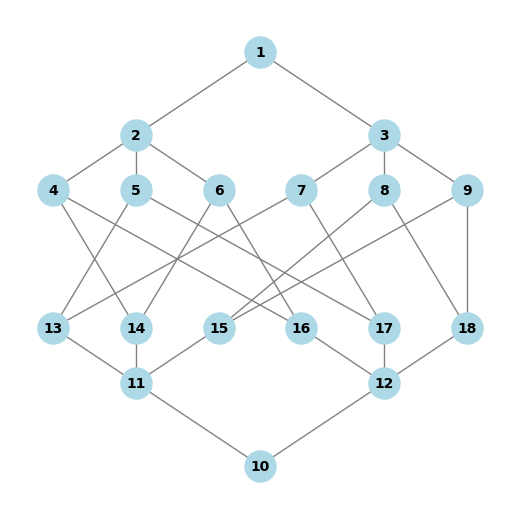

In [10]:
rand = generate_random_cycle_graph(ftree)
pl_graph(rand, positions=rand_cycle_coords(X))

In [14]:
rand.construct_fluxed()
rand.construct_adj()

In [16]:
bare_hamiltonian = rand.adj
fluxed_hamiltonian = rand.weighted_adj(np.pi)

In [17]:
init_state = e_n(0, np.shape(bare_hamiltonian)[0])

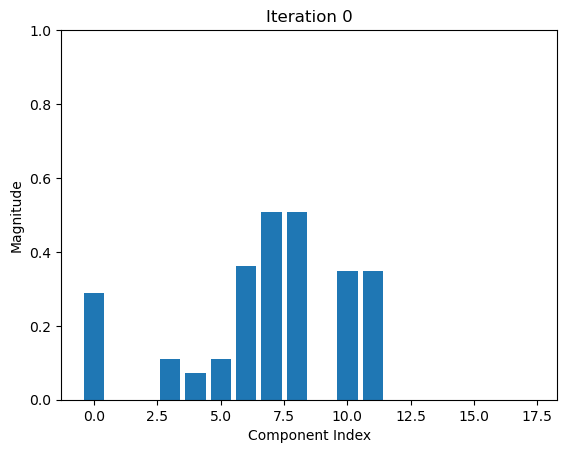

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import HTML

# Define your matrix and initial vector.
A = fluxed_hamiltonian
v = e_n(0, np.shape(bare_hamiltonian)[0])

# Number of iterations for the animation.
num_iterations = 10

# Initialize the current vector.
current_vector = v.copy()

# Set up the figure and axis.
fig, ax = plt.subplots()
n_components = len(current_vector)

# Create a bar plot to represent the magnitude of each component.
bars = ax.bar(np.arange(n_components), np.abs(current_vector), align='center')
ax.set_xlabel("Component Index")
ax.set_ylabel("Magnitude")
ax.set_title("Iteration 0")
ax.set_ylim(0,1)

def update(frame):
    global current_vector
    # Apply the matrix to update the vector.
    current_vector = A @ current_vector
    norm = np.linalg.norm(current_vector)
    magnitudes = np.abs(current_vector)/norm
    # Update the heights of the bars.
    for bar, height in zip(bars, magnitudes):
        bar.set_height(height)
    ax.set_title(f"Iteration {frame}")
    return bars

# Assign the animation object to a variable that persists.
anim = animation.FuncAnimation(fig, update, frames=num_iterations, interval=1000, blit=False)

HTML(anim.to_html5_video())



In [8]:
a = [1,2,3]
a[:-1]

[1, 2]